## Importing packages 

In [37]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split

from seaborn import heatmap

## Downloading data

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## One hot encoding

In [9]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## train/test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_dum.drop(columns=['class_Positive']), df_dum.class_Positive, test_size=0.2)

## Base model

In [21]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Test Base Model

f1_score: 0.944 
 precision: 0.9365079365079365 
 recall: 0.9516129032258065


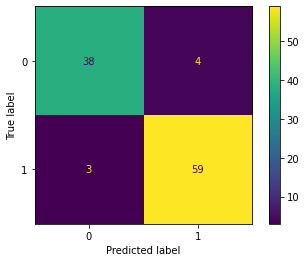

In [40]:
y_pred = model.predict(X_test)
f1 = f1_score(y_pred=y_pred, y_true=y_test)
p = precision_score(y_pred=y_pred, y_true=y_test)
r = recall_score(y_pred=y_pred, y_true=y_test)

print(f"f1_score: {f1} \n precision: {p} \n recall: {r}")

plot_confusion_matrix(model, X_test, y_test)